<a href="https://colab.research.google.com/github/Bhavana-Kolli/22035573_Final-Project_Stock-Market/blob/main/22035573_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [1]:
# Import libraries used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Stocks were imported from Yahoo Finance using yfinance
import yfinance as yf


# **Functions**

In [2]:

# Function to plot the closing price, volume, and moving averages
def plot_stock_data(stock_data, stock_name="Stock"):
    """
    Plotting the closing price, volume, and moving averages for a given stock.
    """

    # Calculate moving averages
    stock_data['Close: 30 Day MA'] = stock_data['Close'].rolling(window=30).mean()
    stock_data['Close: 60 Day MA'] = stock_data['Close'].rolling(window=60).mean()
    stock_data['Close: 100 Day MA'] = stock_data['Close'].rolling(window=100).mean()

    plt.figure(figsize=(10, 12))

    # Plot the closing price
    plt.subplot(3, 1, 1)
    plt.plot(stock_data['Close'], label='Closing Price')
    plt.ylabel('Stock Prices')
    plt.xlabel('Year')
    plt.title(f"Closing Price of {stock_name} Stock")
    plt.legend()

    # Plot the trading volume
    plt.subplot(3, 1, 2)
    plt.plot(stock_data['Volume'], label='Volume Traded')
    plt.ylabel('Volume')
    plt.xlabel('Year')
    plt.title(f"Volume Traded for {stock_name} Stock in Past Decade")
    plt.legend()

    # Plot the moving averages
    plt.subplot(3, 1, 3)
    plt.plot(stock_data['Close'], label='Closing Price')
    plt.plot(stock_data['Close: 30 Day MA'], label='30 Day MA')
    plt.plot(stock_data['Close: 60 Day MA'], label='60 Day MA')
    plt.plot(stock_data['Close: 100 Day MA'], label='100 Day MA')
    plt.ylabel('Stock Prices')
    plt.xlabel('Year')
    plt.title(f"Moving Averages for {stock_name} Stock")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Function for Random Forest hyperparameter tuning
def randomforest_hyperparameter_tuning(X_train, y_train):
    """
    Performs hyperparameter tuning for a Random Forest Regressor using GridSearchCV.

    Returns: A Random Forest model with the best found hyperparameters.

    """
    # Define a dictionary of hyperparameters to tune
    param_grid = {
        # Number of trees in the forest
        'n_estimators': [50, 100, 150],
        # Maximum depth of each tree
        'max_depth': [None, 10, 20],
        # Minimum samples required to split a node
        'min_samples_split': [2, 5, 10]
    }
    # Initialize a Random Forest Regressor with random state as '40'
    rf = RandomForestRegressor(random_state=40)
    # Set up GridSearchCV with 5-fold cross-validation and negative MSE as the scoring metric
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    # Fit the grid search to find the best hyperparameters
    grid_search.fit(X_train, y_train)
    # Return the model with the best found parameters
    return grid_search.best_estimator_


# Function for Support Vector Machine (SVM) Hyperparameter tuning
def svm_hyperparameter_tuning(X_train, y_train):
    """
    Performs hyperparameter tuning for an SVM Regressor using GridSearchCV.

    Returns: An SVM model with the best found hyperparameters.

    """
    # Define a dictionary of hyperparameters to tune
    param_grid = {
        # Regularization parameter
        'C': [1, 10, 100],
        # Kernel coefficient
        'gamma': [0.01, 0.1, 1],
        # Epsilon in the epsilon-SVR model
        'epsilon': [0.1, 0.2, 0.5]
    }
    # Initialize an SVR model with radial basis function kernel
    svm = SVR(kernel='rbf')
    # Set up GridSearchCV with 5-fold cross-validation and negative MSE as the scoring metric
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    # Fit the grid search to find the best hyperparameters
    grid_search.fit(X_train, y_train)
    # Return the model with the best found parameters
    return grid_search.best_estimator_

# **BAE Systems Plc**

## **Data Loading**

In [3]:
# Fetching the data of BAE Systems Plc from yahoo finance

# Define the ticker symbol
bae = "BA.L"

# Download the data for the specified date range
bae_data = yf.download(bae, start="2014-10-01", end="2024-10-01")

# Save the data to a CSV file
bae_data.to_csv('BAE_stock_data_10years.csv')

# Show the data
bae_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BA.L,BA.L,BA.L,BA.L,BA.L,BA.L
Date,,,,,,
2014-10-01 00:00:00+00:00,312.949219,463.200012,474.799988,462.100006,470.899994,6807389
2014-10-02 00:00:00+00:00,306.598328,453.799988,460.000000,453.000000,454.000000,9285952
2014-10-03 00:00:00+00:00,310.922363,460.200012,461.290985,453.299988,454.700012,6578201
2014-10-06 00:00:00+00:00,311.868164,461.600006,465.899994,458.500000,458.500000,6585452
2014-10-07 00:00:00+00:00,304.368744,450.500000,459.757996,445.000000,459.700012,11095801
...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,1255.620117,1267.500000,1276.500000,1261.849976,1273.500000,11342845
2024-09-25 00:00:00+00:00,1262.059204,1274.000000,1276.500000,1256.000000,1257.000000,6238942


In [4]:
# General information of BAE Systems Plc stock
bae_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2526 entries, 2014-10-01 00:00:00+00:00 to 2024-09-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, BA.L)  2526 non-null   float64
 1   (Close, BA.L)      2526 non-null   float64
 2   (High, BA.L)       2526 non-null   float64
 3   (Low, BA.L)        2526 non-null   float64
 4   (Open, BA.L)       2526 non-null   float64
 5   (Volume, BA.L)     2526 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.1 KB


In [5]:
# Summary stats for BAE Systems Plc stock
bae_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BA.L,BA.L,BA.L,BA.L,BA.L,BA.L
count,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2.526000e+03
mean,568.384833,659.810301,666.216326,653.037293,659.922097,7.983746e+06
std,268.185360,235.550137,237.705318,233.742489,235.675575,4.108558e+06
min,295.382904,397.000000,406.399994,5.694000,398.600006,0.000000e+00
25%,402.103813,505.000000,511.000000,499.491997,505.500000,5.408591e+06
50%,460.407623,569.300018,574.000000,564.333527,568.200012,7.127968e+06
75%,675.781067,731.549988,741.170502,718.350021,731.250015,9.637130e+06
max,1386.878296,1400.000000,1415.250000,1395.500000,1403.500000,5.421986e+07


In [6]:
# Print the number of rows in the original data
print('Rows in original data = %d' % (bae_data.shape[0]))

# Drop rows with missing values
df = bae_data.dropna()

# Print the number of rows after discarding missing values
print('Rows after discarding missing values = %d' % (df.shape[0]))

Rows in original data = 2526
Rows after discarding missing values = 2526


## **Preprocessing**

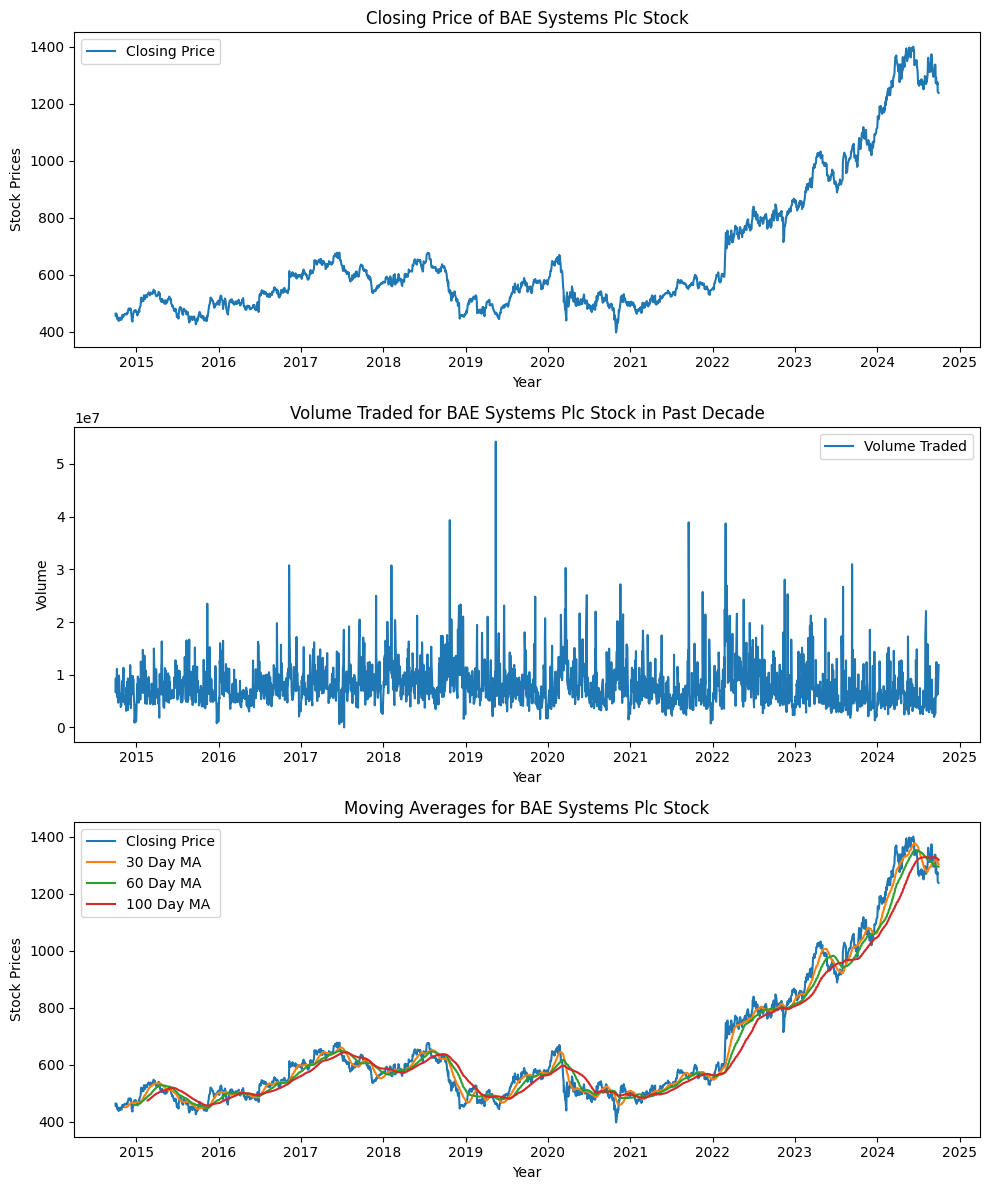

In [7]:
# Plotting the closing price and volume traded for BAE Systems Plc stock over 10 years.
plot_stock_data(bae_data, stock_name="BAE Systems Plc")


In [8]:
# Predict next day's price
bae_data['Target'] = bae_data['Close'].shift(-1)
bae_data.dropna(inplace=True)

# Normalize the data
scaler_bae = MinMaxScaler(feature_range=(0, 1))
scaled_data_bae = scaler_bae.fit_transform(bae_data)

# Split data into training and testing sets
train_size_bae = int(len(scaled_data_bae) * 0.8)
train_bae, test_bae = scaled_data_bae[:train_size_bae], scaled_data_bae[train_size_bae:]

X_train_bae, y_train_bae = train_bae[:, :-1], train_bae[:, -1]
X_test_bae, y_test_bae = test_bae[:, :-1], test_bae[:, -1]

# Calculate the mean of the actual values in y_test_bae
mean_actual_value = y_test_bae.mean()

## **Model Development**

### **Random Forest Model**

In [9]:
# Random Forest model for BAE Systems Plc stock
randomforest_bae = randomforest_hyperparameter_tuning(X_train_bae, y_train_bae)


Percentage Accuracy of Random Forest model for BAE Systems Plc Stock: 53.04%


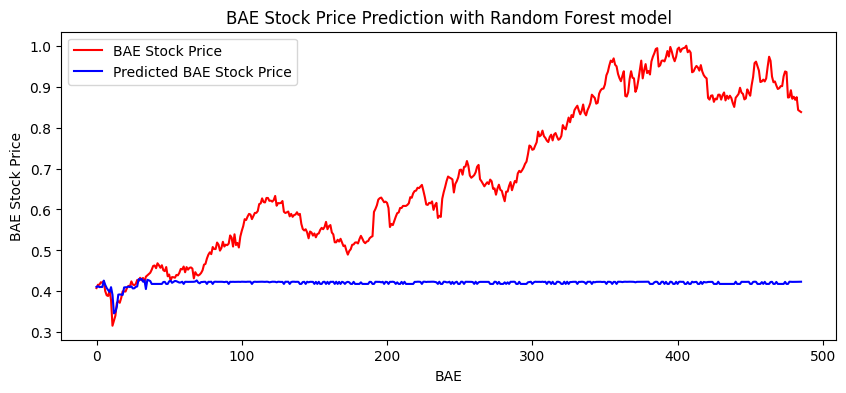

In [10]:
# Calculating mse, rmse, accuracy percentage for BAE Systems Plc stock with Random Forest model

# Calculating the Mean Squared Error on the test data
randomforest_mse_bae = mean_squared_error(y_test_bae, randomforest_bae.predict(X_test_bae))
# Calculating the Root Mean Squared Error (RMSE) from MSE
randomforest_rmse_bae = math.sqrt(randomforest_mse_bae)
# Calculating the accuracy percentage
rf_accuracy_percentage = 100 - ((randomforest_rmse_bae / mean_actual_value) * 100)

# Printing the accuracy percentage for the Random Forest model
print(f"Percentage Accuracy of Random Forest model for BAE Systems Plc Stock: {rf_accuracy_percentage:.2f}%")

# Plotting actual vs predicted for Random Forest model
plt.figure(figsize=(10, 4))
plt.plot(y_test_bae, color='red', label='BAE Stock Price')
plt.plot(randomforest_bae.predict(X_test_bae), color='blue', label='Predicted BAE Stock Price')
plt.title('BAE Stock Price Prediction with Random Forest model')
plt.xlabel('BAE')
plt.ylabel('BAE Stock Price')
plt.legend()
plt.show()

### **SVM Model**

In [11]:
# SVM model for BAE Systems Plc stock
svm_model_bae = svm_hyperparameter_tuning(X_train_bae, y_train_bae)


Percentage Accuracy of SVM model for BAE Systems Plc Stock: 73.25%


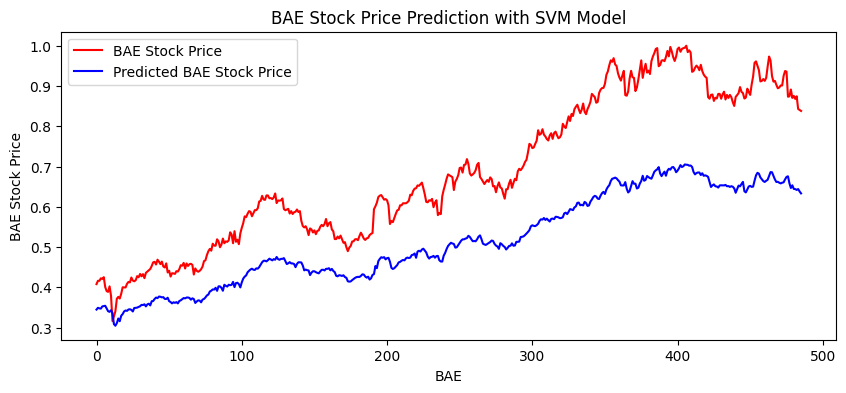

In [12]:
# Calculating mse, rmse, accuracy percentage for BAE Systems Plc stock with SVM model

# Calculating the Mean Squared Error on the test data
svm_mse_bae = mean_squared_error(y_test_bae, svm_model_bae.predict(X_test_bae))
# Calculating the Root Mean Squared Error (RMSE) from MSE
svm_rmse_bae = math.sqrt(svm_mse_bae)
# Calculating the accuracy percentage
svm_accuracy_percentage = 100 - ((svm_rmse_bae / mean_actual_value) * 100)

# Print the accuracy percentage for SVM model
print(f"Percentage Accuracy of SVM model for BAE Systems Plc Stock: {svm_accuracy_percentage:.2f}%")

# Plotting actual vs predicted for SVM model
plt.figure(figsize=(10, 4))
plt.plot(y_test_bae, color='red', label='BAE Stock Price')
plt.plot(svm_model_bae.predict(X_test_bae), color='blue', label='Predicted BAE Stock Price')
plt.title('BAE Stock Price Prediction with SVM Model')
plt.xlabel('BAE')
plt.ylabel('BAE Stock Price')
plt.legend()
plt.show()